## Perspective Transform

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

import ipywidgets as wg
from IPython.display import display

from ipywidgets import interact, interactive, fixed

import pickle as pkl


from PIL import Image as Image



%matplotlib qt



In [2]:
#Loading Camera Calibration
cameraCalibration = pkl.load( open('./pickle_data_store/camera_calibration.p', 'rb' ) )
objpoints, imgpoints, mtx, dist = map(cameraCalibration.get, ('objpoints', 'imgpoints', 'mtx', 'dist'))

In [3]:

# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)
    undist = cv2.undistort(img, mtx, dist, None, mtx) 
    return undist, mtx, dist


def image_unwarp(img, src, dst):
    
    undist, mtx, dist = cal_undistort(img, objpoints, imgpoints)
        
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
        
    img_size = (gray.shape[1], gray.shape[0]) 
        
    # Given src and dst points, calculate the perspective transform matrix
    M = cv2.getPerspectiveTransform(src, dst)
    
    
    #Inverse Perspective Transform 
    Minv = cv2.getPerspectiveTransform(dst, src)
    
    # Warp the image using OpenCV warpPerspective()
    warped = cv2.warpPerspective(undist, M, img_size)
    
    return warped, M, Minv


def visualize_pts(img, pts):
    for pt in pts:
        print(tuple(pt))
        img = cv2.circle(img,tuple(pt),10,(255,0,0),-1)
        
    return img

# [ref: http://bistr-o-mathik.org/2012/06/13/simple-transparency-in-opencv/]
def fill_lane(img, pts):
    overlay = img.copy()
    cv2.fillPoly(overlay,np.int_([pts]),(0,255,0))
    cv2.addWeighted(overlay,0.4,img,1-0.4,0,img)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    

(540.0, 490.0)
(750.0, 490.0)
(250.0, 682.0)
(1042.0, 682.0)


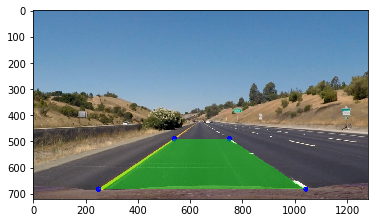

In [4]:
img = cv2.imread('./test_images/straight_lines1.jpg')


h,w=img.shape[:2]
# define source and destination points for transform
src = np.float32([
                  (540 ,490 ),
                  (750 ,490), 
                   (250,682),
                  (1042,682)])
dst = np.float32([(250,0),
                  (w-250,0),
                  (250,682),
                  (w-250,682)])




unwarped_image, M, Minv = image_unwarp(img,src,dst)


img = visualize_pts(img,src)


pts=np.array([[540,490],[750,490],[1042,682],[250,682]], np.int32)
pts = pts.reshape((-1,1,2))
#plt.imshow(cv2.fillPoly(img,np.int_([pts]),(0,255,0)))
plt.imshow(fill_lane(img,pts))
plt.show()

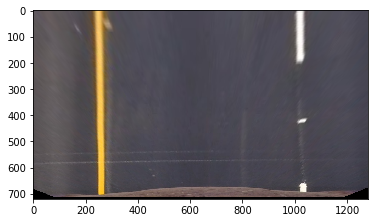

In [5]:
plt.imshow(cv2.cvtColor(unwarped_image, cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
pkl.dump( { 'M': M, 'Minv': Minv }, open('./pickle_data_store/perspective_transform.p', 'wb'))

(595.0, 450.0)
(686.0, 450.0)
(250.0, 682.0)
(1042.0, 682.0)


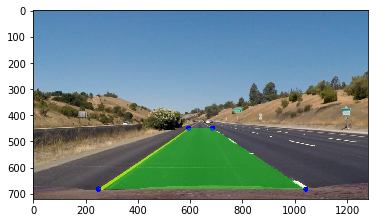

In [7]:
img = cv2.imread('./test_images/straight_lines1.jpg')


h,w=img.shape[:2]
# define source and destination points for transform
src = np.float32([
                  (595 ,450 ),
                  (686 ,450), 
                   (250,682),
                  (1042,682)])
dst = np.float32([(250,0),
                  (w-250,0),
                  (250,682),
                  (w-250,682)])




unwarped_image, M, Minv = image_unwarp(img,src,dst)


img = visualize_pts(img,src)


pts=np.array([[595,450],[686,450],[1042,682],[250,682]], np.int32)
pts = pts.reshape((-1,1,2))
#plt.imshow(cv2.fillPoly(img,np.int_([pts]),(0,255,0)))

img_points=fill_lane(img,pts)
plt.imshow(img_points)
plt.show()

image = Image.fromarray(img_points)
image.save('./output_images/Perspective_Transform_img_points.jpg')

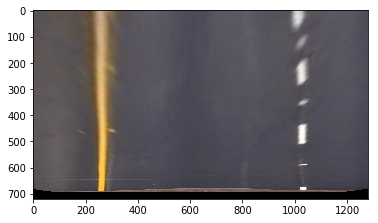

In [8]:
plt.imshow(cv2.cvtColor(unwarped_image, cv2.COLOR_BGR2RGB))
plt.show()

image = Image.fromarray(img_points)
image.save('./output_images/Perspective_Transform_unwarped.jpg')

In [9]:
pkl.dump( { 'M': M, 'Minv': Minv }, open('./pickle_data_store/perspective_transform.p', 'wb'))